In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('files/Twitter_Data.csv')

In [4]:
df.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [5]:
df['clean_text'][89]

'this face doesn’ haunt you condemn the abduction girls but they’ alive and wel also recorded message still our personally ordered action unlike modi who treats muslims just vote bank'

In [8]:
x = df['clean_text']
x

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162980, dtype: object

In [10]:
y = df['category']

In [11]:
y

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162980, dtype: float64

In [12]:
import seaborn as sns

C:\Users\Akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

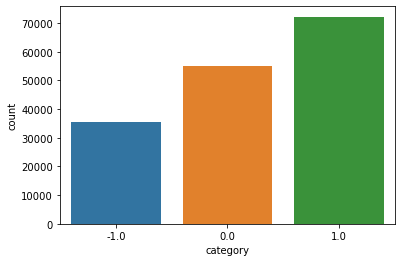

In [13]:
sns.countplot(y)

In [29]:
from nltk.corpus import stopwords
import nltk
import re
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

In [30]:
voc_size = 10000

In [31]:
len(x)

162980

In [32]:
type(x[2])

str

In [37]:
#data preprocessing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(x)):
    string = str(x[i])
    review = re.sub('[^a-zA-Z]', ' ', string)
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [38]:
corpus

['modi promised minimum government maximum governance expected begin difficult job reforming state take year get justice state business exit psus temple',
 'talk nonsense continue drama vote modi',
 'say vote modi welcome bjp told rahul main campaigner modi think modi relax',
 'asking supporter prefix chowkidar name modi great service confusion read crustal clear crass filthy nonsensical see abuse coming chowkidars',
 'answer among powerful world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat woman perform yagna seek divine grace narendra modi become',
 'come cabinet scholar like modi smriti hema time introspect',
 'upcoming election india saga going important pair look current modi lead govt elected deal brexit combination weekly look juicy bear imho',
 'gandhi gay modi',
 'thing like demonetisation gst good service tax upper caste would sort either view favourably say need give time caste like dalits muslim modi constituency',
 'hope tuthukudi

In [39]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
maxc= 0
for ls in onehot_repr:
        maxc += len(ls)
maxc/len(onehot_repr)

14.158829304209105

In [41]:
maxc

2307606

In [40]:
onehot_repr[0]

[9319,
 2806,
 2127,
 2663,
 2442,
 7055,
 2211,
 361,
 3627,
 9800,
 8727,
 8468,
 4863,
 4265,
 5175,
 4300,
 8468,
 8719,
 966,
 6352,
 8242]

In [42]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[2806 2127 2663 ...  966 6352 8242]
 [   0    0    0 ... 7378 1298 9319]
 [   0    0    0 ... 2178 9319 1443]
 ...
 [   0    0    0 ... 3741 1153  438]
 [   0    0    0 ... 8120 3232 8142]
 [2246 8230 2490 ... 4863 4110 9086]]


In [43]:
embedded_docs[1489]

array([   0,    0,    0,    0,    0,    0, 3655, 8468, 5283, 9319, 6460,
       8868,  766, 9158, 2182, 5907, 8868, 1791, 8387, 2806])

In [52]:
Y = pd.get_dummies(y).values

In [53]:
Y[678]

array([0, 1, 0], dtype=uint8)

In [55]:
## Creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(SimpleRNN(100))
model.add(Dense(3,activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           1000000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,020,403
Trainable params: 1,020,403
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
len(embedded_docs)

162980

In [62]:
# Train tesst split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(embedded_docs,Y,test_size=0.20, random_state=42)

In [63]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
2038/2038 [==============================] - 31s 15ms/step - loss: 0.0617 - accuracy: 0.9795 - val_loss: 1.5087 - val_accuracy: 0.7387
Epoch 2/5
2038/2038 [==============================] - 29s 14ms/step - loss: 0.0596 - accuracy: 0.9803 - val_loss: 1.5628 - val_accuracy: 0.7405
Epoch 3/5
2038/2038 [==============================] - 27s 13ms/step - loss: 0.0550 - accuracy: 0.9822 - val_loss: 1.5913 - val_accuracy: 0.7487
Epoch 4/5
2038/2038 [==============================] - 31s 15ms/step - loss: 0.0579 - accuracy: 0.9808 - val_loss: 1.5722 - val_accuracy: 0.7468
Epoch 5/5
2038/2038 [==============================] - 28s 14ms/step - loss: 0.0551 - accuracy: 0.9821 - val_loss: 1.6426 - val_accuracy: 0.7392


In [64]:
accuracy = model.evaluate(x_test,y_test)
accuracy

1019/1019 [==============================] - 4s 4ms/step - loss: 1.6426 - accuracy: 0.7392


[1.6426153182983398, 0.7392318248748779]

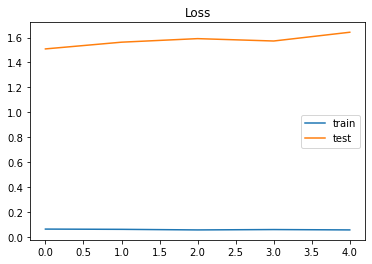

In [65]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

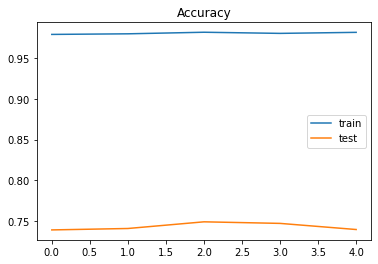

In [66]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [74]:
y_test[0]

array([0, 1, 0], dtype=uint8)

In [75]:
x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 6570,
       4630, 6151, 9319, 7948, 3394, 2339, 8640, 2007, 4630])

In [76]:
pred = model.predict(x_train[:96])

3/3 [==============================] - 0s 4ms/step


In [77]:
pred

array([[3.83381499e-04, 9.99266326e-01, 3.50336311e-04],
       [4.77588955e-08, 9.99997139e-01, 2.90917615e-06],
       [1.71143925e-04, 3.72903487e-05, 9.99791563e-01],
       [3.70475464e-05, 9.96055365e-01, 3.90756549e-03],
       [9.99635100e-01, 3.64879379e-04, 2.27697186e-08],
       [1.48615595e-06, 4.48024839e-05, 9.99953747e-01],
       [2.03730701e-03, 2.57925858e-05, 9.97936964e-01],
       [1.86396835e-04, 9.99762118e-01, 5.14872481e-05],
       [1.58720140e-04, 9.99736130e-01, 1.05150211e-04],
       [8.35246756e-04, 6.41815495e-05, 9.99100566e-01],
       [1.08779443e-06, 9.99983907e-01, 1.50526703e-05],
       [3.50207728e-07, 5.01438954e-05, 9.99949455e-01],
       [8.42956651e-04, 1.56851835e-04, 9.99000251e-01],
       [9.67345774e-01, 4.86016925e-03, 2.77940612e-02],
       [1.49657944e-05, 9.99981642e-01, 3.37792244e-06],
       [1.31939998e-06, 1.82134585e-07, 9.99998450e-01],
       [3.33911230e-05, 9.99966502e-01, 1.15862960e-07],
       [5.53238010e-07, 9.99991

In [78]:
cls = ['Negative', 'Neutral' ,'Positive']

In [79]:
import numpy as np
for i in range(56,96):
    print('predicted :',cls[np.argmax(pred[i])])
    print('actual', cls[np.argmax(y_train[i])])
    print("--------------------------------")
    

predicted : Neutral
actual Neutral
--------------------------------
predicted : Neutral
actual Neutral
--------------------------------
predicted : Neutral
actual Positive
--------------------------------
predicted : Negative
actual Negative
--------------------------------
predicted : Neutral
actual Neutral
--------------------------------
predicted : Positive
actual Positive
--------------------------------
predicted : Negative
actual Negative
--------------------------------
predicted : Positive
actual Positive
--------------------------------
predicted : Positive
actual Positive
--------------------------------
predicted : Neutral
actual Neutral
--------------------------------
predicted : Neutral
actual Neutral
--------------------------------
predicted : Neutral
actual Neutral
--------------------------------
predicted : Positive
actual Positive
--------------------------------
predicted : Negative
actual Negative
--------------------------------
predicted : Positive
actual Negat

In [98]:
sent = ['India is a country']

In [99]:
sent_clean = re.sub('[^a-zA-Z]', ' ', sent[0])
sent_clean = sent_clean.lower()
sent_clean = sent_clean.split()
    
sent_clean = [lemmatizer.lemmatize(word) for word in sent_clean if not word in stopwords.words('english')]
sent_clean = ' '.join(sent_clean)
sent_clean1 = []
sent_clean1.append(sent_clean)

In [100]:
sent_clean1

['india country']

In [101]:
onehot_repr_sent=[one_hot(words,voc_size)for words in sent_clean1]

In [102]:
len(onehot_repr_sent)

1

In [103]:
embedded_docs_sent=pad_sequences(onehot_repr_sent,padding='pre',maxlen=sent_length)
print(embedded_docs_sent)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 5907 3627]]


In [104]:
embedded_docs_sent.shape

(1, 20)

In [105]:
p = model.predict(embedded_docs_sent)

1/1 [==============================] - 0s 24ms/step


In [106]:
print('predicted :',cls[np.argmax(p)])

predicted : Neutral
